In [1]:
import xarray as xr
import numpy as np
import pandas as pd
%matplotlib inline
from mpl_toolkits.basemap import Basemap
from matplotlib import pyplot as plt
from dask.diagnostics import ProgressBar
import seaborn as sns
from matplotlib.colors import LogNorm

In [2]:
# resampling frequency in number of days
freq=2

             time        id        lat        lon       temp         ve  \
0      2002-07-04     10206  16.229625  66.330375        NaN  13.064500   
1      2002-07-04     10208  13.891875  69.552375        NaN   8.505125   
2      2002-07-04     11089  16.354375  64.683750  27.954125  12.168000   
3      2002-07-04     15703  13.903250  69.583125  28.552250   8.685875   
4      2002-07-04     27069  20.169750  68.737500  29.012000  26.958750   
5      2002-07-04     28842  18.878875  60.694625  27.701750  10.499125   
6      2002-07-04     34159  12.548125  58.914250        NaN  27.354250   
7      2002-07-04     34210   6.476750  56.925000  26.694875  -9.666750   
8      2002-07-04     34211   8.602375  67.929125  28.278000  20.618125   
9      2002-07-04     34212   6.232000  64.750250  28.470750  14.641875   
10     2002-07-04     34708  10.167500  59.691500  27.185500  47.792000   
11     2002-07-04     34710  12.933625  49.905250  30.910625 -34.754625   
12     2002-07-04     347

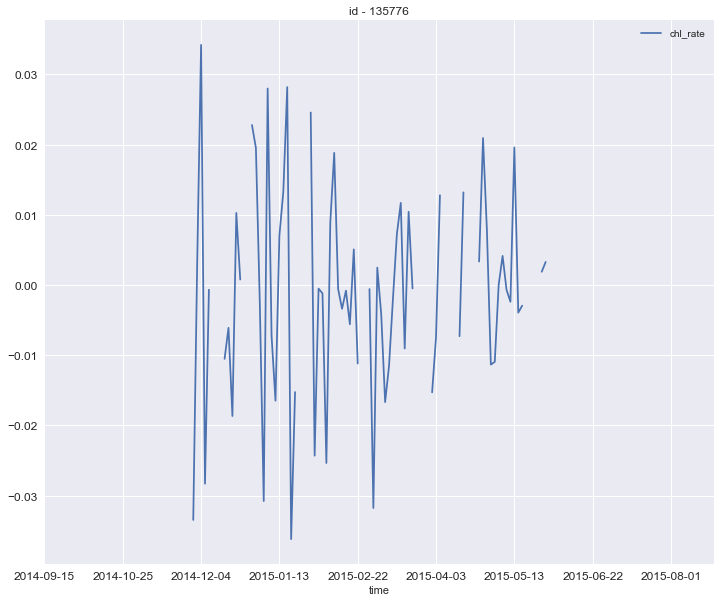

In [3]:
# load preprocessed float data, and start the interpolation right here!!!!
var7 = "chlrateweekno"
var6 = "sst4"
var5 = "par"
var4 = "t865"
var3 = "kd490"
var2 = "cdm"
var1 = "chl"
vardist = "dist"

indir_prefix = "../../data_collector_globcolour/output.data.interpolate/2017GDPfloat/" + "df_Globcolor_"
indir = indir_prefix + var1 + vardist + var2 + var3 + var4 + var5 + var6 + var7 + "_" + str(freq) + "d.csv"

floatDF_tmp = pd.read_csv(indir,index_col=0)
print(floatDF_tmp)


### plot for id 125776, which will be fit by LDS
#plt.figure(figsize=(10,12))
floatDF_tmp[floatDF_tmp.id == 135776].plot(x='time', y ='chl_rate', title=('id - %d' % 135776), figsize=(12,10), fontsize=12 )
plt.show();
plt.close("all")

In [4]:
# https://stackoverflow.com/questions/16780014/import-file-from-parent-directory
# https://stackoverflow.com/questions/16771894/python-nameerror-global-name-file-is-not-defined
import os, sys
sys.path.append(os.path.dirname(os.path.dirname(os.path.dirname(os.path.abspath("__file__")))))

from tools import chl_rates  # del(chl_rates)
import importlib
importlib.reload(chl_rates)

<module 'tools.chl_rates' from '/Users/vyan2000/work_linux/2Archive/myproject/20161024xray_oceancolor/ocean_color-master/tools/chl_rates.py'>

In [5]:
print("\n ******* Reduce the Dataset to 'Nov-01 to Mar-31' ******* \n" )
floatsDF_NovMar = chl_rates.reduce_to_NovMar(floatDF_tmp)
floatsDF_NovMar


 ******* Reduce the Dataset to 'Nov-01 to Mar-31' ******* 

all the data count in [11-01, 03-31]  is  (3932,)


,time,id,lat,lon,temp,ve,vn,spd,var_lat,var_lon,...,sst4,chlor_a_log_e,chl_rate,chl_log_e_rate,chl_rate_week,chl_log_e_rate_week,chl_rate_stand,chl_log_e_rate_stand,week,week_rotate
907,2002-11-01,10206,10.737250,67.512250,NaN,-4.832250,6.374250,9.069875,0.000272,0.000719,...,29.292499,-1.921645,-0.005333,-0.035171,-0.037333,-0.246199,-0.011023,-0.138664,44,1
908,2002-11-01,11089,14.163375,65.330375,29.059750,-9.491125,6.442875,13.878500,0.000057,0.000106,...,28.683749,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44,1
909,2002-11-01,15707,14.197250,68.405375,NaN,-22.495125,1.167000,22.872625,0.000071,0.000140,...,29.338992,-1.861949,NaN,NaN,NaN,NaN,NaN,NaN,44,1
910,2002-11-01,34315,6.824250,58.284375,29.299375,11.405750,-34.943250,39.244250,0.000045,0.000081,...,28.621874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44,1
911,2002-11-01,34710,16.764500,63.115250,29.013125,0.536625,14.745500,15.588375,0.000062,0.000119,...,27.504999,-0.967747,0.023261,0.065307,0.162824,0.457150,0.019548,0.369692,44,1
912,2002-11-01,34721,12.577000,67.553000,29.335125,1.065000,7.905750,10.247000,0.000066,0.000125,...,29.138749,-1.702484,0.020277,0.125864,0.141940,0.881048,0.016359,0.676070,44,1
913,2002-11-03,10206,10.818500,67.399375,NaN,-8.207500,7.311375,12.395125,0.000295,0.000778,...,28.825901,-2.134598,-0.014037,-0.106476,-0.098258,-0.745333,-0.020329,-0.499421,44,1
914,2002-11-03,11089,14.247750,65.189625,28.986625,-9.065625,4.137875,12.149875,0.000060,0.000116,...,28.817188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44,1
915,2002-11-03,15707,14.162000,68.048125,NaN,-21.659125,-5.021500,22.922125,0.000074,0.000144,...,28.937047,-1.890368,-0.002177,-0.014210,-0.015237,-0.099467,-0.007648,-0.032612,44,1
916,2002-11-03,34315,6.310750,58.277125,29.485250,-7.001500,-29.505125,30.616000,0.000054,0.000099,...,28.617658,-2.041916,NaN,NaN,NaN,NaN,NaN,NaN,44,1


In [6]:
floatsDF_NovMar.columns.values

array(['time', 'id', 'lat', 'lon', 'temp', 've', 'vn', 'spd', 'var_lat',
       'var_lon', 'var_tmp', 'chlor_a', 'dist', 'cdm', 'kd490', 't865',
       'par', 'sst4', 'chlor_a_log_e', 'chl_rate', 'chl_log_e_rate',
       'chl_rate_week', 'chl_log_e_rate_week', 'chl_rate_stand',
       'chl_log_e_rate_stand', 'week', 'week_rotate'], dtype=object)


 ******* output csv files for each month with chl_rates ******* 



/Users/vyan2000/local/miniconda3/envs/condapython3/lib/python3.5/site-packages/ipykernel/__main__.py:13: FutureWarning: to_datetime is deprecated. Use pd.to_datetime(...)




 summary of the Chl_rate 
 count    510.000000
mean       0.004673
std        0.251375
min       -1.223355
25%       -0.101752
50%       -0.002938
75%        0.118857
max        1.359777
Name: chl_rate_week, dtype: float64

/Users/vyan2000/local/miniconda3/envs/condapython3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/Users/vyan2000/local/miniconda3/envs/condapython3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/vyan2000/local/miniconda3/envs/condapython3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


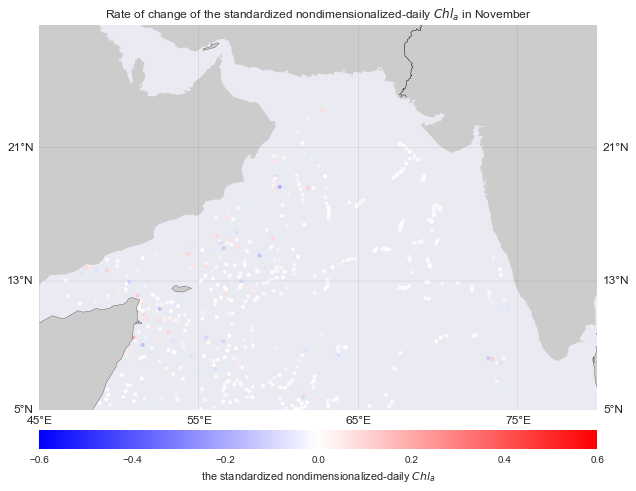

           time        id        lat        lon       temp          ve  \
0    2002-11-01     34710  16.764500  63.115250  29.013125    0.536625   
1    2002-11-01     34721  12.577000  67.553000  29.335125    1.065000   
2    2002-11-03     34710  16.965375  63.133750  28.976250    2.729500   
3    2002-11-03     34721  12.647250  67.570000  29.435500    3.303000   
4    2002-11-05     34315   5.841500  58.012625  29.795625  -28.546625   
5    2002-11-05     34710  17.127000  63.160750  28.991250    0.491500   
6    2002-11-05     34721  12.609750  67.649875  29.602625    5.022500   
7    2002-11-07     11089  14.366875  64.835375  28.939625  -15.401500   
8    2002-11-07     34315   5.613000  57.375375  29.647125  -49.749875   
9    2002-11-07     34710  17.297375  63.170375  28.900250   -0.728375   
10   2002-11-07     34721  12.580125  67.781000  29.472625    8.845375   
11   2002-11-09     11089  14.356250  64.586375  29.047125  -14.547875   
12   2002-11-09     34710  17.463125  

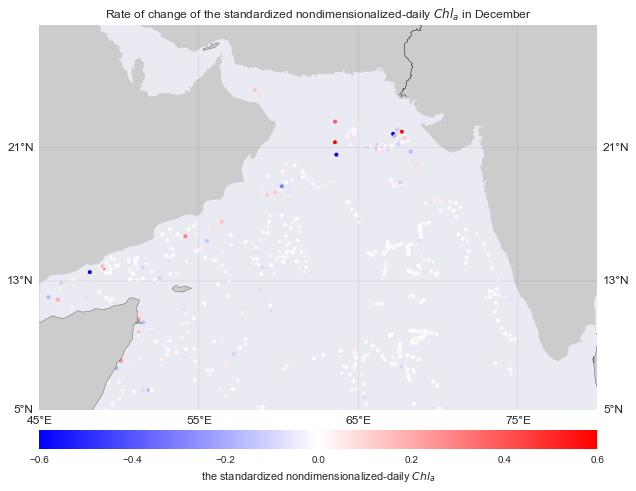

           time        id        lat        lon       temp         ve  \
0    2002-12-01     11089  13.464750  59.746375  27.787875 -34.191375   
1    2002-12-01     34315   6.325875  57.136625  29.152500 -43.623250   
2    2002-12-01     34710  22.506000  63.540375  27.212750  28.900750   
3    2002-12-01     34721  14.616000  68.144750  28.928125   0.107500   
4    2002-12-03     11089  13.764625  59.157125  27.653625 -37.164750   
5    2002-12-03     34315   6.289875  56.320500  28.744000 -60.573375   
6    2002-12-03     34710  21.308000  63.536375  27.071000 -16.860500   
7    2002-12-03     34721  14.761125  68.175500  28.846000   0.083000   
8    2002-12-05     11089  14.338875  58.677125  27.407000 -20.481250   
9    2002-12-05     34710  20.580875  63.625750  26.900000  32.082500   
10   2002-12-05     34721  14.890625  68.152125  28.743500  -3.875625   
11   2002-12-07     11089  15.033875  58.584500  27.098125   7.056250   
12   2002-12-07     34721  15.020500  68.071125  28

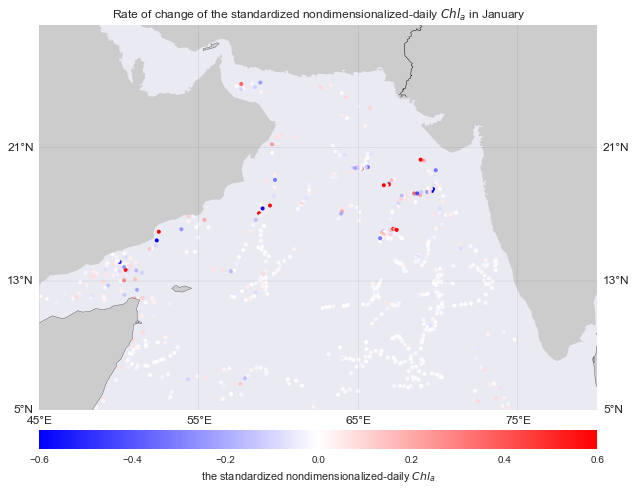

           time        id        lat        lon       temp         ve  \
0    2003-01-02     11089  15.047250  58.719875  26.313000  11.142875   
1    2003-01-02     34315   8.506000  50.776500  26.853875 -34.412625   
2    2003-01-02     34710  20.586750  64.165750  25.460375 -18.635875   
3    2003-01-02     34721  15.575125  66.847000  27.363500   0.381375   
4    2003-01-04     11089  14.938875  58.916375  26.211875  13.180750   
5    2003-01-04     34315   7.644500  50.155875  26.719750 -46.863375   
6    2003-01-04     34710  20.537250  63.818250  25.214000 -19.686750   
7    2003-01-04     34721  15.746750  66.837000  27.194375  -1.647875   
8    2003-01-06     11089  14.640500  59.109250  26.119500  10.025750   
9    2003-01-06     34315   6.319500  49.287000  26.539500 -67.205375   
10   2003-01-06     34710  20.756000  63.550750  25.246125 -13.838875   
11   2003-01-06     34721  15.889750  66.799875  27.118125  -3.530375   
12   2003-01-08     11089  14.193375  59.211125  26

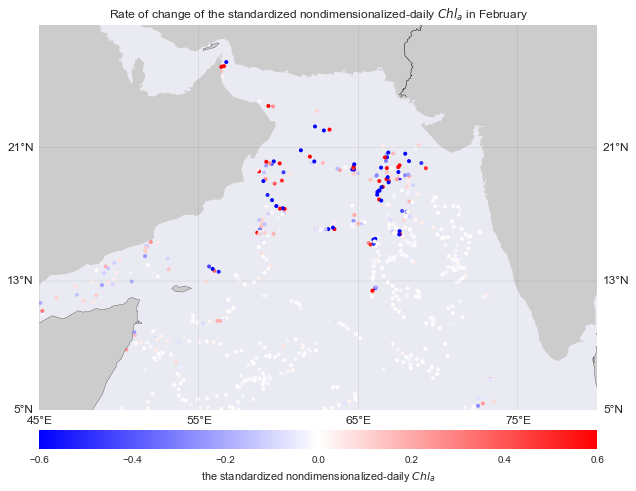

           time        id        lat        lon       temp         ve  \
0    2003-02-01     11089  11.606125  57.528750  26.208250 -25.083625   
1    2003-02-01     27139  19.944500  59.220375  25.029125 -12.602375   
2    2003-02-01     34721  15.517875  67.877125  26.791125   8.965250   
3    2003-02-03     11089  11.341375  57.176875  26.395125 -25.018375   
4    2003-02-03     27139  19.538125  59.085625  24.876250  -4.357750   
5    2003-02-03     34721  15.435125  68.000125  26.684250   6.600875   
6    2003-02-05     11089  11.117000  56.851000  26.360500  -9.955500   
7    2003-02-05     27139  19.141500  59.185875  24.760375  22.052875   
8    2003-02-05     34721  15.352375  68.122125  26.632500   8.918125   
9    2003-02-07     27139  18.869625  59.754625  24.992000  38.450000   
10   2003-02-07     34721  15.254250  68.269375  26.669000   6.426625   
11   2003-02-09     11089  10.705625  56.494750  26.517000 -12.737250   
12   2003-02-09     27139  19.052000  60.211750  25

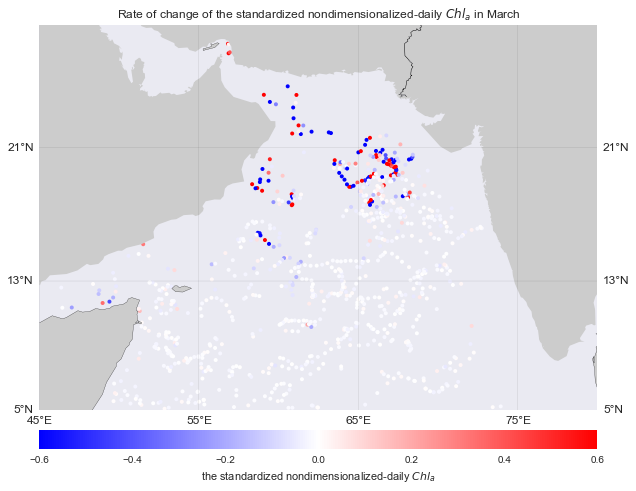

           time        id        lat        lon       temp         ve  \
0    2003-03-01     11089  11.034625  54.312625  27.590500 -41.258125   
1    2003-03-01     34721  16.490375  68.099500  27.647500  -3.543750   
2    2003-03-03     11089  11.284500  53.640125  26.961250 -22.235750   
3    2003-03-03     27139  17.751250  60.635000  24.969250  28.171750   
4    2003-03-03     34721  16.894375  67.948375  27.178375 -14.452875   
5    2003-03-05     11089  11.540000  53.526500  26.921125  -2.182500   
6    2003-03-05     27139  17.585875  60.828500  25.000500   2.703000   
7    2003-03-05     34721  17.387500  67.662625  26.844000 -22.743750   
8    2003-03-07     11089  11.701875  53.393375  27.180000  -7.940000   
9    2003-03-07     27139  17.634250  60.865250  25.357625   3.460375   
10   2003-03-07     34721  17.714375  67.215500  26.812625 -31.746125   
11   2003-03-09     11089  11.776125  53.428625  27.405875  -3.541875   
12   2003-03-09     27139  18.006250  60.904000  25

In [7]:
# https://matplotlib.org/basemap/api/basemap_api.html
#  https://matplotlib.org/basemap/users/examples.html 
#  combine "Plot precip with filled contours" & "Plot markers at locations" 
print("\n ******* output csv files for each month with chl_rates ******* \n")
# just to make sure
mask_NovMar = (floatsDF_NovMar.week <= 14) | (floatsDF_NovMar.week >= 44)
df_timed_NovMar = floatsDF_NovMar[mask_NovMar].dropna()

df_timed_NovMar_ind = df_timed_NovMar.set_index(['time'])
for i in range(0, 5, 1):
    month_ind = np.array([11, 12, 1, 2, 3])
    month_names = ['November', 'December', 'January', 'February', 'March']
    aa = df_timed_NovMar_ind[df_timed_NovMar_ind.index.to_datetime().month == month_ind[i]]

    # prpare the coordinates transformation
    lats = aa['lat'].values
    lons = aa['lon'].values
    colors = aa['chl_rate_stand'].values
    
    fig, ax = plt.subplots(figsize=(10, 12))
    ##aa.plot(kind='scatter', x='lon', y='lat', c='chl_rate', cmap='RdBu_r',
    # vmin=aa.chl_rate.median()-0.5*aa.chl_rate.std(), vmax=aa.chl_rate.median()-0.5*aa.chl_rate.std(),
    # edgecolor='none', ax=ax, title = 'rate of change of the $Chl_a$')
    ##aa.plot(kind='scatter', x='lon', y='lat', c='chl_rate', cmap='RdBu_r',
    # vmin=aa.chl_rate.mean()-0.5*aa.chl_rate.std(), vmax=aa.chl_rate.mean()+0.5*aa.chl_rate.std(),
    # edgecolor='none', ax=ax, title = 'rate of change of the $Chl_a$')
    print('\n\n summary of the Chl_rate \n', aa.chl_rate_week.describe())
    # a straight basemap, but why the coastline is not full
    bmap = Basemap(width=12000000,height=9000000,projection='merc',
                   resolution='l',lat_1=28,lat_0=16,lon_0=60,
                   llcrnrlon=45,llcrnrlat=5,urcrnrlon=80,urcrnrlat=28)
    x, y = bmap(lons, lats)  # map the coordinates
    bmap.drawcoastlines(linewidth = 0.25)
    bmap.fillcontinents()
    # cmap = 'RdBu_r'
    #bmap.plot(kind='scatter', x=aa['lon'], y=aa['lat'], color = aa['chl_rate_stand'], cmap='bwr')
            #vmin=-0.6, vmax=0.6, edgecolor='none', s=10, ax=ax)
    bmapobj = bmap.scatter(x, y, c = colors,  cmap='bwr',
                 vmin=-0.6, vmax=0.6, edgecolor='none', s=16, ax=ax)
    # draw parallels
    bmap.drawparallels(np.arange(5,30,8),linewidth=0.125, labels=[1,1,0,1])
    # draw meridians
    bmap.drawmeridians(np.arange(45,80,10),linewidth=0.125,labels=[1,1,0,1])
    ax.set_title("Rate of change of the standardized nondimensionalized-daily "
                 "$Chl_a$ in %s" % (month_names[i]), fontsize=12)
    cbar = bmap.colorbar(bmapobj,location='bottom',pad="5%")
    cbar.set_label('the standardized nondimensionalized-daily $Chl_a$')
    #plt.xticks(np.arange(45, 80, 2.5))
    #plt.yticks(np.arange(0, 28, 2.5))
    #plt.savefig(str(freq)+"D_monthly_spatial_chl_rate_" + month_names[i] +".jpg")
    plt.show()
    
    outpath = "../../data/" + "chl_rates_"+ month_names[i]+ "_" +str(freq) + "d.csv"
    aa.to_csv(outpath, sep=',')
    test = pd.read_csv(outpath)
    print(test)   

plt.close('all')

/Users/vyan2000/local/miniconda3/envs/condapython3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/vyan2000/local/miniconda3/envs/condapython3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


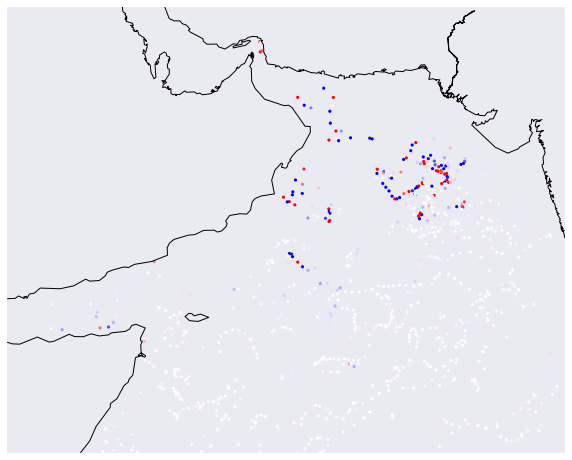

In [8]:
#### Add basemap
#### approach 1
#https://matplotlib.org/basemap/api/basemap_api.html
#from mpl_toolkits.basemap import Basemap
# setup Lambert Conformal basemap.

lats = aa['lat'].values
lons = aa['lon'].values
colors = aa['chl_rate_stand'].values

plt.figure(figsize=(10,12))
m = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution='l',lat_1=28,lat_0=16,lon_0=60,
           llcrnrlon=45,llcrnrlat=5,urcrnrlon=75,urcrnrlat=28)
# draw coastlines.
x, y = m(lons, lats)
m.drawcoastlines(linewidth = 1)
#x, y = m(aa['lon'], aa['lat']) # compute map proj coordinates.
#m.contourf(x,y, color= aa['chl_rate_stand'], markersize=24)
#m.plot(kind='scatter', x=aa['lon'], y=aa['lat'], color = aa['chl_rate_stand'], cmap='bwr')
            #vmin=-0.6, vmax=0.6, edgecolor='none', s=10, ax=ax)

#m.scatter(x,y,color= colors,marker='o')
m.scatter(x, y, c = colors,  cmap='bwr',
        vmin=-0.6, vmax=0.6, edgecolor='none', s=10)
    
#m.drawcountries()
# draw a boundary around the map, fill the background.
# this background will end up being the ocean color, since
# the continents will be drawn on top.
#m.drawmapboundary(fill_color='aqua')
# fill continents, set lake color same as ocean color.
#m.fillcontinents(color='coral')
plt.show()
plt.close('all')

/Users/vyan2000/local/miniconda3/envs/condapython3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()


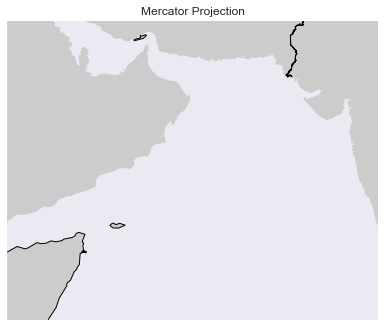

In [9]:
### Another approach
# llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon
# are the lat/lon values of the lower left and upper right corners
# of the map.
# lat_ts is the latitude of true scale.
# resolution = 'c' means use crude resolution coastlines.
m = Basemap(projection='merc',llcrnrlat=5,urcrnrlat=28,\
            llcrnrlon=45,urcrnrlon=75,lat_ts=20,
            lat_0=16,lon_0=60, resolution='l')
m.drawcoastlines()
m.fillcontinents()
# draw parallels and meridians.
#m.drawmapboundary()
plt.title("Mercator Projection")
plt.show()
plt.close('all')